In [1]:
import pandas as pd
import matplotlib.pyplot as plt

metadata = pd.read_csv('pg_catalog.csv')

In [2]:
metadata.shape

(75627, 9)

In [3]:
metadata.head()

,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
0,1,Text,1971-12-01,The Declaration of Independence of the United ...,en,"Jefferson, Thomas, 1743-1826","United States -- History -- Revolution, 1775-1...",E201; JK,Politics; American Revolutionary War; United S...
1,2,Text,1972-12-01,The United States Bill of Rights\r\nThe Ten Or...,en,United States,Civil rights -- United States -- Sources; Unit...,JK; KF,Politics; American Revolutionary War; United S...
2,3,Text,1973-11-01,John F. Kennedy's Inaugural Address,en,"Kennedy, John F. (John Fitzgerald), 1917-1963",United States -- Foreign relations -- 1961-196...,E838,Browsing: History - American; Browsing: Politics
3,4,Text,1973-11-01,Lincoln's Gettysburg Address\r\nGiven November...,en,"Lincoln, Abraham, 1809-1865",Consecration of cemeteries -- Pennsylvania -- ...,E456,US Civil War; Browsing: History - American; Br...
4,5,Text,1975-12-01,The United States Constitution,en,United States,United States -- Politics and government -- 17...,JK; KF,United States; Politics; American Revolutionar...


In [4]:
en_metadata = metadata[
    (metadata["Language"] == "en") & 
    (~metadata["Authors"].str.contains(";", case=False, na=False))
]

en_metadata.head()

,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
0,1,Text,1971-12-01,The Declaration of Independence of the United ...,en,"Jefferson, Thomas, 1743-1826","United States -- History -- Revolution, 1775-1...",E201; JK,Politics; American Revolutionary War; United S...
1,2,Text,1972-12-01,The United States Bill of Rights\r\nThe Ten Or...,en,United States,Civil rights -- United States -- Sources; Unit...,JK; KF,Politics; American Revolutionary War; United S...
2,3,Text,1973-11-01,John F. Kennedy's Inaugural Address,en,"Kennedy, John F. (John Fitzgerald), 1917-1963",United States -- Foreign relations -- 1961-196...,E838,Browsing: History - American; Browsing: Politics
3,4,Text,1973-11-01,Lincoln's Gettysburg Address\r\nGiven November...,en,"Lincoln, Abraham, 1809-1865",Consecration of cemeteries -- Pennsylvania -- ...,E456,US Civil War; Browsing: History - American; Br...
4,5,Text,1975-12-01,The United States Constitution,en,United States,United States -- Politics and government -- 17...,JK; KF,United States; Politics; American Revolutionar...


In [5]:
en_metadata["Authors"]

0                             Jefferson, Thomas, 1743-1826
1                                            United States
2            Kennedy, John F. (John Fitzgerald), 1917-1963
3                              Lincoln, Abraham, 1809-1865
4                                            United States
                               ...                        
75595    E. C. H. (Ernest Charles Holtom) (Surgeon), 18...
75603                                Glenn, Isa, 1874-1951
75606                                     Pansy, 1841-1930
75608             Wells, H. G. (Herbert George), 1866-1946
75612              Drake, H. B. (Henry Burgess), 1894-1963
Name: Authors, Length: 42357, dtype: object

In [6]:
def extract_author_and_dates(author):
    if not isinstance(author, str):
        return None, None
    if ',' in author:
        parts = author.split(',')
        name = parts[0].strip()
        if len(parts) > 1 and parts[-1].strip().replace('-', '').isdigit():
            dates = parts[-1].strip()
            return name, dates
    return author.strip(), None


en_metadata[['Author_Name', 'Author_Dates']] = en_metadata['Authors'].apply(lambda x: pd.Series(extract_author_and_dates(x)))

en_metadata.head()

/tmp/ipykernel_41647/1204166524.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_metadata[['Author_Name', 'Author_Dates']] = en_metadata['Authors'].apply(lambda x: pd.Series(extract_author_and_dates(x)))
/tmp/ipykernel_41647/1204166524.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_metadata[['Author_Name', 'Author_Dates']] = en_metadata['Authors'].apply(lambda x: pd.Series(extract_author_and_dates(x)))


,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves,Author_Name,Author_Dates
0,1,Text,1971-12-01,The Declaration of Independence of the United ...,en,"Jefferson, Thomas, 1743-1826","United States -- History -- Revolution, 1775-1...",E201; JK,Politics; American Revolutionary War; United S...,Jefferson,1743-1826
1,2,Text,1972-12-01,The United States Bill of Rights\r\nThe Ten Or...,en,United States,Civil rights -- United States -- Sources; Unit...,JK; KF,Politics; American Revolutionary War; United S...,United States,None
2,3,Text,1973-11-01,John F. Kennedy's Inaugural Address,en,"Kennedy, John F. (John Fitzgerald), 1917-1963",United States -- Foreign relations -- 1961-196...,E838,Browsing: History - American; Browsing: Politics,Kennedy,1917-1963
3,4,Text,1973-11-01,Lincoln's Gettysburg Address\r\nGiven November...,en,"Lincoln, Abraham, 1809-1865",Consecration of cemeteries -- Pennsylvania -- ...,E456,US Civil War; Browsing: History - American; Br...,Lincoln,1809-1865
4,5,Text,1975-12-01,The United States Constitution,en,United States,United States -- Politics and government -- 17...,JK; KF,United States; Politics; American Revolutionar...,United States,None


In [7]:
def get_era_birthyear(dates):
    if isinstance(dates, str) and '-' in dates:
        birth_year = dates.split('-')[0].strip()
        if birth_year.isdigit():
            birth_year = int(birth_year)
            era = (birth_year // 100) * 100
            return f"{era}s"
    return None

def get_era_ave(dates):
    if isinstance(dates, str) and '-' in dates:
        birth_year = dates.split('-')[0].strip()
        death_year = birth_year = dates.split('-')[0].strip()
        if birth_year.isdigit() and death_year.isdigit():
            birth_year = int(birth_year)
            death_year = int(death_year)
            era = int((((birth_year // 100) + (death_year // 100))/2) * 100)
            return f"{era}s"
    return None

en_metadata['Era'] = en_metadata['Author_Dates'].apply(get_era_ave)
en_metadata.head()

/tmp/ipykernel_41647/4255234111.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_metadata['Era'] = en_metadata['Author_Dates'].apply(get_era_ave)


,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves,Author_Name,Author_Dates,Era
0,1,Text,1971-12-01,The Declaration of Independence of the United ...,en,"Jefferson, Thomas, 1743-1826","United States -- History -- Revolution, 1775-1...",E201; JK,Politics; American Revolutionary War; United S...,Jefferson,1743-1826,1700s
1,2,Text,1972-12-01,The United States Bill of Rights\r\nThe Ten Or...,en,United States,Civil rights -- United States -- Sources; Unit...,JK; KF,Politics; American Revolutionary War; United S...,United States,None,None
2,3,Text,1973-11-01,John F. Kennedy's Inaugural Address,en,"Kennedy, John F. (John Fitzgerald), 1917-1963",United States -- Foreign relations -- 1961-196...,E838,Browsing: History - American; Browsing: Politics,Kennedy,1917-1963,1900s
3,4,Text,1973-11-01,Lincoln's Gettysburg Address\r\nGiven November...,en,"Lincoln, Abraham, 1809-1865",Consecration of cemeteries -- Pennsylvania -- ...,E456,US Civil War; Browsing: History - American; Br...,Lincoln,1809-1865,1800s
4,5,Text,1975-12-01,The United States Constitution,en,United States,United States -- Politics and government -- 17...,JK; KF,United States; Politics; American Revolutionar...,United States,None,None


In [8]:
en_metadata = en_metadata.dropna()
en_metadata.head()

,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves,Author_Name,Author_Dates,Era
0,1,Text,1971-12-01,The Declaration of Independence of the United ...,en,"Jefferson, Thomas, 1743-1826","United States -- History -- Revolution, 1775-1...",E201; JK,Politics; American Revolutionary War; United S...,Jefferson,1743-1826,1700s
2,3,Text,1973-11-01,John F. Kennedy's Inaugural Address,en,"Kennedy, John F. (John Fitzgerald), 1917-1963",United States -- Foreign relations -- 1961-196...,E838,Browsing: History - American; Browsing: Politics,Kennedy,1917-1963,1900s
3,4,Text,1973-11-01,Lincoln's Gettysburg Address\r\nGiven November...,en,"Lincoln, Abraham, 1809-1865",Consecration of cemeteries -- Pennsylvania -- ...,E456,US Civil War; Browsing: History - American; Br...,Lincoln,1809-1865,1800s
5,6,Text,1976-12-01,Give Me Liberty or Give Me Death,en,"Henry, Patrick, 1736-1799","Speeches, addresses, etc., American; United St...",E201,American Revolutionary War; Browsing: History ...,Henry,1736-1799,1700s
7,8,Text,1978-12-01,Abraham Lincoln's Second Inaugural Address,en,"Lincoln, Abraham, 1809-1865",United States -- Politics and government -- 18...,E456,US Civil War; Browsing: History - American; Br...,Lincoln,1809-1865,1800s


In [9]:
en_metadata.shape

(31537, 12)

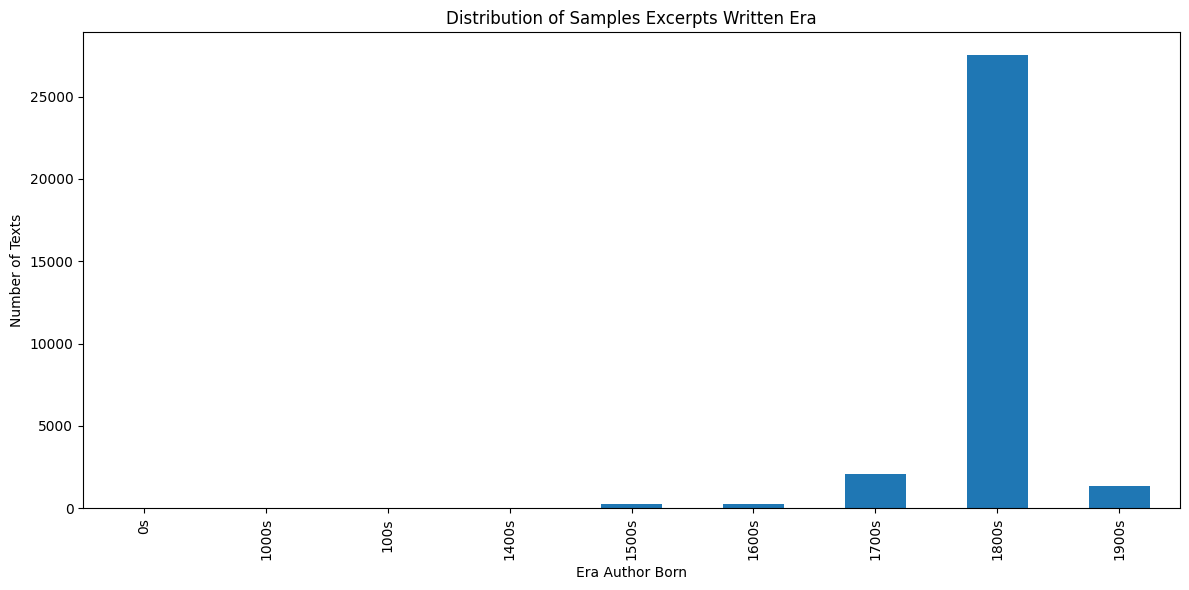

In [10]:
plt.figure(figsize=(12, 6))
eras = en_metadata["Era"].value_counts().sort_index()
eras.plot(kind='bar')

plt.title('Distribution of Samples Excerpts Written Era')
plt.xlabel('Era Author Born')
plt.ylabel('Number of Texts')

plt.tight_layout()
plt.show()

In [11]:
eras = en_metadata["Era"].value_counts().sort_index()
eras

Era
0s           2
1000s        1
100s         1
1400s       13
1500s      239
1600s      292
1700s     2109
1800s    27520
1900s     1360
Name: count, dtype: int64

In [12]:
en_metadata.iloc[0]

Text#                                                           1
Type                                                         Text
Issued                                                 1971-12-01
Title           The Declaration of Independence of the United ...
Language                                                       en
Authors                              Jefferson, Thomas, 1743-1826
Subjects        United States -- History -- Revolution, 1775-1...
LoCC                                                     E201; JK
Bookshelves     Politics; American Revolutionary War; United S...
Author_Name                                             Jefferson
Author_Dates                                            1743-1826
Era                                                         1700s
Name: 0, dtype: object

In [13]:
import os

def text_number_to_path(text_number, base_path='cache/epub'):
    """
    Given a Text# (e.g., 9996), return the full path to the .txt file.
    """
    text_str = str(text_number)
    path = os.path.join(base_path, text_str, f'pg{text_str}.txt')
    return path

def load_text_by_number(text_number, base_path='cache/epub'):
    """
    Load the text content from a Gutenberg .txt file based on Text#.
    """
    path = text_number_to_path(text_number, base_path)
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read()
    return content

In [14]:
text_number = 1  #
try:
    content = load_text_by_number(text_number)
    print(content[:1000])
except FileNotFoundError as e:
    print(e)

﻿The Project Gutenberg eBook of The Declaration of Independence of the United States of America
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Declaration of Independence of the United States of America

Author: Thomas Jefferson

Release date: December 1, 1971 [eBook #1]
                Most recently updated: December 6, 2024

Language: English



*** START OF THE PROJECT GUTENBERG EBOOK THE DECLARATION OF INDEPENDENCE OF THE UNITED STATES OF AMERICA ***


     NOTE:  This file combines the first two Project Gutenberg
   


In [15]:
len(content)

124400

In [16]:
middle = len(content) // 2
start = max(0, middle - 500)
end = middle + 500
snippet = content[start:end]
print(snippet)

e
song of that siren till she transforms us into beasts.  Is this the part
of wise men, engaged in a great and arduous struggle for liberty?
Are we disposed to be of the number of those who, having eyes, see not,
and, having ears, hear not, the things which so nearly concern their
temporal salvation?  For my part, whatever anguish of spirit it may cost,
I am willing to know the whole truth; to know the worst, and to provide for it.

I have but one lamp by which my feet are guided, and that is the lamp of
experience.  I know of no way of judging of the future but by the past.
And judging by the past, I wish to know what there has been in the conduct
of the British ministry for the last ten years to justify those hopes with
which  gentlemen have been pleased to solace themselves and the House.
Is it that insidious smile with which our petition has been lately received?
Trust it not, sir; it will prove a snare to your feet.  Suffer not yourselves
to be betrayed with a kiss.  Ask yourselve

In [17]:
eras = ['1400s', '1500s', '1600s', '1700s', '1800s', '1900s']
en_metadata = en_metadata[en_metadata['Era'].isin(eras)].reset_index(drop=True)
print(en_metadata['Era'].unique())

['1700s' '1900s' '1800s' '1600s' '1500s' '1400s']


In [18]:
#en_metadata.to_csv('full_english_metadata.csv', index=False)